## Fichier de test pour le module non-lineaire

In [1]:
import sys
sys.path.insert(0, '../src')

from Linear import Linear

from activation.TanH import TanH
from activation.Sigmoide import Sigmoide

from loss.MSELoss import MSELoss

from matplotlib import pyplot as plt
import numpy as np 
from mltools import plot_data, plot_frontiere, make_grid, gen_arti

from tqdm import tqdm

In [2]:
class NonLin:
    def __init__(self):
        self.list_error = []

    def fit(self,X, y, nombre_neurone, n_iter = 30000 , learning_rate = 0.01, biais = False):
        if biais == True:
            bias = np.ones((len(X), 1))
            X = np.hstack((bias, X))

        # Initialisation des modules
        self.mse = MSELoss()
        self.linear_1 = Linear(X.shape[1], nombre_neurone)
        self.TanH = TanH()
        self.linear_2 = Linear(nombre_neurone, y.shape[1])
        self.sigmoide = Sigmoide()

        for _ in range(n_iter):
            
            # phase forward
            res1 = self.linear_1.forward(X)
            res2 = self.TanH.forward(res1)
            res3 = self.linear_2.forward(res2)
            res4 = self.sigmoide.forward(res3)

            self.list_error.append(np.sum(self.mse.forward(y, res4))) # loss
            print('Loss :',np.mean(self.mse.forward(y, res4)))
            #  retro propagation du gradient de la loss par rapport aux parametres et aux entrees
            last_delta = self.mse.backward(y, res4)

            delta_sig = self.sigmoide.backward_delta(res3, last_delta)
            delta_lin = self.linear_2.backward_delta(res2, delta_sig)
            delta_tan = self.TanH.backward_delta(res1, delta_lin)

            self.linear_1.backward_update_gradient(X, delta_tan)
            self.linear_2.backward_update_gradient(res2, delta_sig)

            # mise a jour  de la matrice de poids
            self.linear_1.update_parameters(learning_rate)
            self.linear_2.update_parameters(learning_rate)

            self.linear_1.zero_grad()
            self.linear_2.zero_grad()

    def predict(self,xtest,biais = False):
        print("Xtest 5 shape ",xtest.shape)
        if biais == True:
            bias = np.ones((len(xtest), 1))
            xtest = np.hstack((bias, xtest))
        res1 = self.linear_1.forward(xtest)
        res2 = self.TanH.forward(res1)
        res3 = self.linear_2.forward(res2)
        res4 = self.sigmoide.forward(res3)
        print("y_hat : ",res4.shape)
        return np.where(res4>=0.5,1,0)

Loss : 0.41585044628120704
Loss : 0.3919914515627642
Loss : 0.37926096875794046
Loss : 0.37031811238841117
Loss : 0.36156187920678023
Loss : 0.3509784168557269
Loss : 0.3368687069427125
Loss : 0.31636460784929826
Loss : 0.28991604839605906
Loss : 0.2775374415027376
Loss : 0.27166454552742325
Loss : 0.26676721848887597
Loss : 0.26285942390752653
Loss : 0.259856684365737
Loss : 0.257640343067081
Loss : 0.2563015937648156
Loss : 0.25692190684523325
Loss : 0.2646702921927182
Loss : 0.29304763225864705
Loss : 0.3340827744290885
Loss : 0.3182151561000454
Loss : 0.3178919736156264
Loss : 0.3097120202166193
Loss : 0.3172986907641984
Loss : 0.31047610257188346
Loss : 0.31546410205240577
Loss : 0.3075787439887351
Loss : 0.3143374941859182
Loss : 0.3066981401683147
Loss : 0.31323192068646677
Loss : 0.3051319642098897
Loss : 0.31213421930364077
Loss : 0.30407076699546404
Loss : 0.3112024179412205
Loss : 0.3029877067411741
Loss : 0.31025910635249465
Loss : 0.30205806973090354
Loss : 0.3094037329670

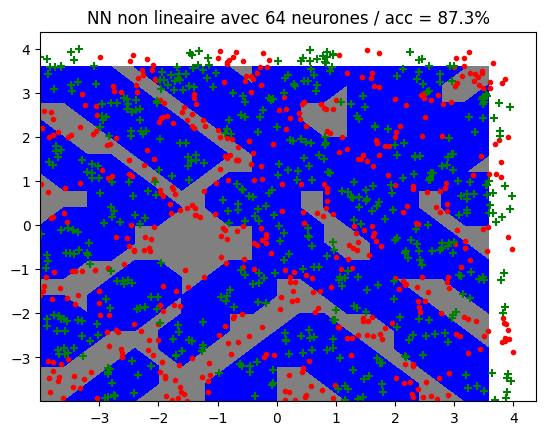

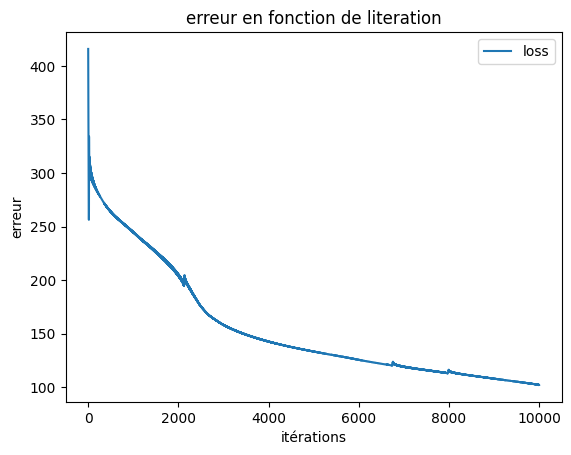

In [3]:
# generations de points 
np.random.seed(1)
X, y = gen_arti(data_type=2, epsilon=0.001) # 4 gaussiennes
if y.ndim == 1 : 
    y = y.reshape((-1,1))
nombre_neurone = 64

y = np.where(y > 0 , 1  , 0)

neural_network_non_lineaire = NonLin()
neural_network_non_lineaire.fit(X,y,nombre_neurone=nombre_neurone,n_iter=10000,learning_rate=0.001)

acc = np.where(y == neural_network_non_lineaire.predict(X),1,0).mean()

# affichage de la frontiere de decision ainsi que des donnees
plt.figure()
plot_frontiere(X,neural_network_non_lineaire.predict)
plot_data(X,y)
plt.title(f"NN non lineaire avec {nombre_neurone} neurones / acc = {(acc*100)}%")
plt.show()

# affichage de la courbe d'errreur
plt.figure()
plt.title('erreur en fonction de literation')
plt.plot(neural_network_non_lineaire.list_error, label='loss')
plt.legend()
plt.xlabel('itérations')
plt.ylabel('erreur')
plt.show()